In [3]:
from util import *
from seq2seq import *
import tltk, jiwer

# additional dict data

In [8]:
df = pd.read_csv('data/g2p_dict.csv')
df.g.to_csv('data/dic_x.txt', index=False, header=None)
df.rtgs.to_csv('data/dic_y.txt', index=False, header=None)

# load data

In [9]:
# load data
train_x = open('data/train_x.txt').read().splitlines()
train_y = open('data/train_y.txt').read().splitlines()
test_x = open('data/test_x.txt').read().splitlines()
test_y = open('data/test_y.txt').read().splitlines()

dic_x = open('data/dic_x.txt').read().splitlines()
dic_y = open('data/dic_y.txt').read().splitlines()

In [10]:
### Instantiation
data = Data()
data.set_train(train_x, train_y)
data.set_test(test_x, test_y)

### additional dict data
data.set_train(dic_x, dic_y)

In [11]:
### build model
seq2seq1 = Seq2Seq(data, attention=False)
seq2seq1.build(show_summary=False, opt='rmsprop', loss='categorical_crossentropy')

seq2seq2 = Seq2Seq(data, attention=True)
seq2seq2.build(show_summary=False, opt='rmsprop', loss='categorical_crossentropy')

Epoch 1/50


2022-06-23 09:59:50.685814: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


29/29 [==============================] - 11s 251ms/step - loss: 1.1259 - accuracy: 0.2603
Epoch 2/50
29/29 [==============================] - 8s 258ms/step - loss: 0.8162 - accuracy: 0.4171
Epoch 3/50
29/29 [==============================] - 8s 281ms/step - loss: 0.7023 - accuracy: 0.4755
Epoch 4/50
29/29 [==============================] - 10s 334ms/step - loss: 0.6090 - accuracy: 0.5393
Epoch 5/50
29/29 [==============================] - 10s 334ms/step - loss: 0.5224 - accuracy: 0.5990
Epoch 6/50
29/29 [==============================] - 10s 341ms/step - loss: 0.4472 - accuracy: 0.6588
Epoch 7/50
29/29 [==============================] - 9s 316ms/step - loss: 0.3856 - accuracy: 0.7066
Epoch 8/50
29/29 [==============================] - 9s 304ms/step - loss: 0.3316 - accuracy: 0.7514
Epoch 9/50
29/29 [==============================] - 9s 308ms/step - loss: 0.2888 - accuracy: 0.7823
Epoch 10/50
29/29 [==============================] - 9s 306ms/step - loss: 0.2476 - accuracy: 0.8135
Epoch 

<AxesSubplot:xlabel='Epoch'>

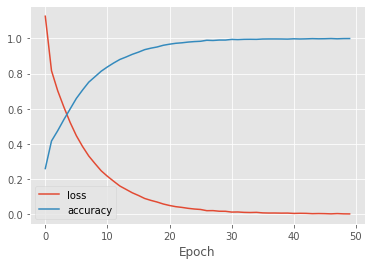

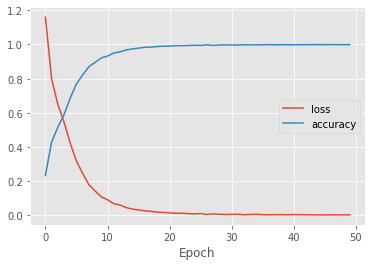

In [6]:
# train
seq2seq1.train(batch_size=100, epoch=50, dev_split=0)
seq2seq2.train(batch_size=100, epoch=50, dev_split=0)

In [7]:
pred1 = seq2seq1.predict(join_by='')
pred2 = seq2seq2.predict(join_by='')
df = pd.DataFrame({'thai':test_x,'pred1':pred1,'pred2':pred2, 'answer':test_y})
pred_tltk = [tltk.nlp.th2roman(x).replace('<s/>','').replace(' ','') for x in list(df.answer)]
df['tltk'] = pred_tltk
df[['thai','answer','tltk','pred1','pred2']].to_csv('pred/pred_nodict.csv', index=False)

 98%|█████████▊| 687/700 [03:50<00:04,  2.98it/s]


KeyError: 'ฌ'

In [16]:
def evaluate(df):
    cols = df.columns
    gold_list = list(df.answer)
    tempdf = pd.DataFrame(index=['WER','CER macro', 'CER micro'])

    for col in cols:
        if col in ['answer', 'thai']:
            continue
        pred_list = list(df[col])
        WER = jiwer.wer(pred_list, gold_list)
        CERmacro = np.mean([jiwer.cer(p,g) for p,g in zip(pred_list, gold_list)])
        CERmicro = sum([jiwer.cer(p,g)*len(g) for p,g in zip(pred_list, gold_list)])/sum([len(g) for g in gold_list])
        tempdf[col] = [WER, CERmacro, CERmicro]
    return tempdf

evaluate(df)

,pred1,pred2,tltk
WER,0.172840,0.108642,0.101235
CER macro,0.043355,0.026617,0.013554
CER micro,0.044962,0.028573,0.013101


In [29]:
i = np.random.randint(0,810)

print(test_x[i])
print(seq2seq1.predict_one(test_x[i], is_beam=True, beam_return_all=True, join_by=''))
print(test_y[i])

แดนชัย
['daenchai', 'deanchai', 'denchai']
daenchai


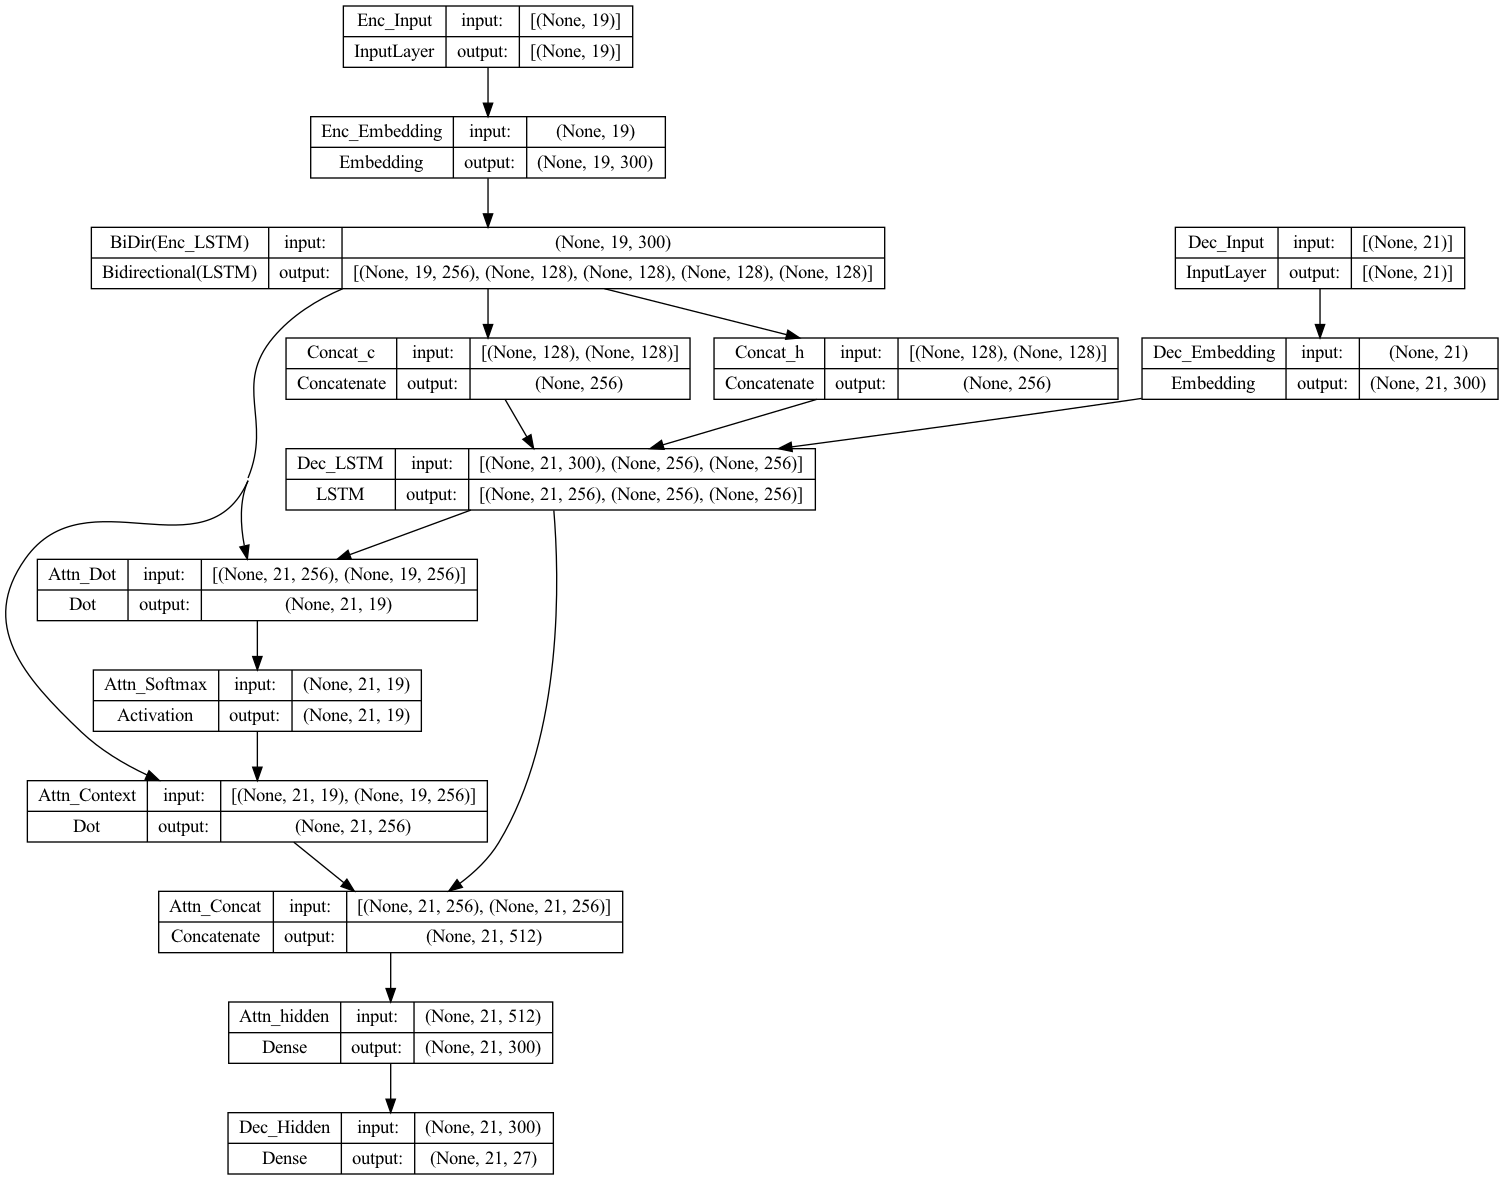

In [36]:
seq2seq2.show_model()

In [15]:
seq2seq2.model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Enc_Input (InputLayer)         [(None, 55)]         0           []                               
                                                                                                  
 Enc_Embedding (Embedding)      (None, 55, 300)      21900       ['Enc_Input[0][0]']              
                                                                                                  
 Dec_Input (InputLayer)         [(None, 69)]         0           []                               
                                                                                                  
 BiDir (Bidirectional)          [(None, 55, 400),    801600      ['Enc_Embedding[0][0]']          
                                 (None, 200),                                               

In [9]:
b = np.array([1,2,3,4,5])
b[[1,4]]

array([2, 5])